In [1]:
import pandas as pd

In [55]:
pd_contest = pd.read_csv('./data/cf.csv')
pd_contest['startTimeSeconds'] = pd.to_datetime(
    pd_contest['startTimeSeconds'], unit='s')
pd_contest.rename(columns={'startTimeSeconds': 'startTime'}, inplace=True)
pd_contest

,durationSeconds,name,type,phase,startTime,frozen,id,relativeTimeSeconds
0,10800,Codeforces Round (Div. 1 + Div. 2),CF,BEFORE,2024-04-06 14:35:00,False,1951,-777732
1,7200,April Fools Day Contest 2024,ICPC,BEFORE,2024-04-01 14:35:00,False,1952,-345732
2,10800,"CodeTON Round 8 (Div. 1 + Div. 2, Rated, Prizes!)",CF,BEFORE,2024-03-30 14:35:00,False,1942,-172932
3,8100,Codeforces Round 937 (Div. 4),ICPC,BEFORE,2024-03-28 14:45:00,False,1950,-734
4,18000,European Championship 2024 - Online Mirror (Un...,ICPC,FINISHED,2024-03-24 10:00:00,False,1949,361968
...,...,...,...,...,...,...,...,...
1848,7200,Codeforces Beta Round 5,ICPC,FINISHED,2010-03-20 16:00:00,False,5,442535569
1849,7200,Codeforces Beta Round 4 (Div. 2 Only),ICPC,FINISHED,2010-03-12 12:00:00,False,4,443241169
1850,7200,Codeforces Beta Round 3,ICPC,FINISHED,2010-03-07 12:00:00,False,3,443673169
1851,7200,Codeforces Beta Round 2,ICPC,FINISHED,2010-02-25 17:00:00,False,2,444519169


In [56]:
# get different type and count
print(pd_contest['type'].value_counts())

CF      1381
ICPC     433
IOI       39
Name: type, dtype: int64


In [57]:
ids = set(pd_contest['id'].values)
# sort by id
missing = []
for i in range(1, max(ids) + 1):
    if i not in ids:
        missing.append(i)
print('missing contest ids:', missing)
print('number of missing contests:', len(missing))

missing contest ids: [179, 184, 210, 307, 310, 395, 410, 422, 423, 428, 473, 481, 502, 503, 511, 517, 539, 561, 563, 564, 565, 589, 619, 654, 692, 694, 783, 824, 829, 836, 880, 881, 882, 941, 942, 943, 945, 968, 969, 970, 971, 972, 973, 974, 1018, 1021, 1022, 1024, 1026, 1035, 1069, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1134, 1135, 1232, 1233, 1289, 1306, 1317, 1318, 1390, 1429, 1448, 1449, 1502, 1507, 1518, 1564, 1565, 1568, 1577, 1587, 1590, 1636, 1640, 1643, 1645, 1653, 1655, 1664, 1683, 1727, 1745, 1756, 1757, 1803, 1865, 1871, 1880, 1892, 1897, 1908, 1947]
number of missing contests: 99


In [60]:
pd_contest_div2 = pd_contest[pd_contest['name'].str.contains('(Div. 2)', regex=False)]
print(pd_contest_div2['durationSeconds'].value_counts())
pd_contest_div2.head()

7200     546
8100      45
9000      43
7800      15
7500       6
8700       2
10800      2
9600       1
Name: durationSeconds, dtype: int64


,durationSeconds,name,type,phase,startTime,frozen,id,relativeTimeSeconds
5,7200,Codeforces Round 936 (Div. 2),CF,FINISHED,2024-03-22 14:35:00,False,1946,518267
8,8700,Codeforces Round 934 (Div. 2),CF,FINISHED,2024-03-16 14:35:00,False,1944,1036667
13,7200,Codeforces Round 932 (Div. 2),CF,FINISHED,2024-03-05 14:35:00,False,1935,1987068
15,7200,Codeforces Round 931 (Div. 2),CF,FINISHED,2024-03-01 14:35:00,False,1934,2332668
17,7200,Codeforces Round 930 (Div. 2),CF,FINISHED,2024-02-29 14:35:00,False,1937,2419068


<Axes: xlabel='month'>

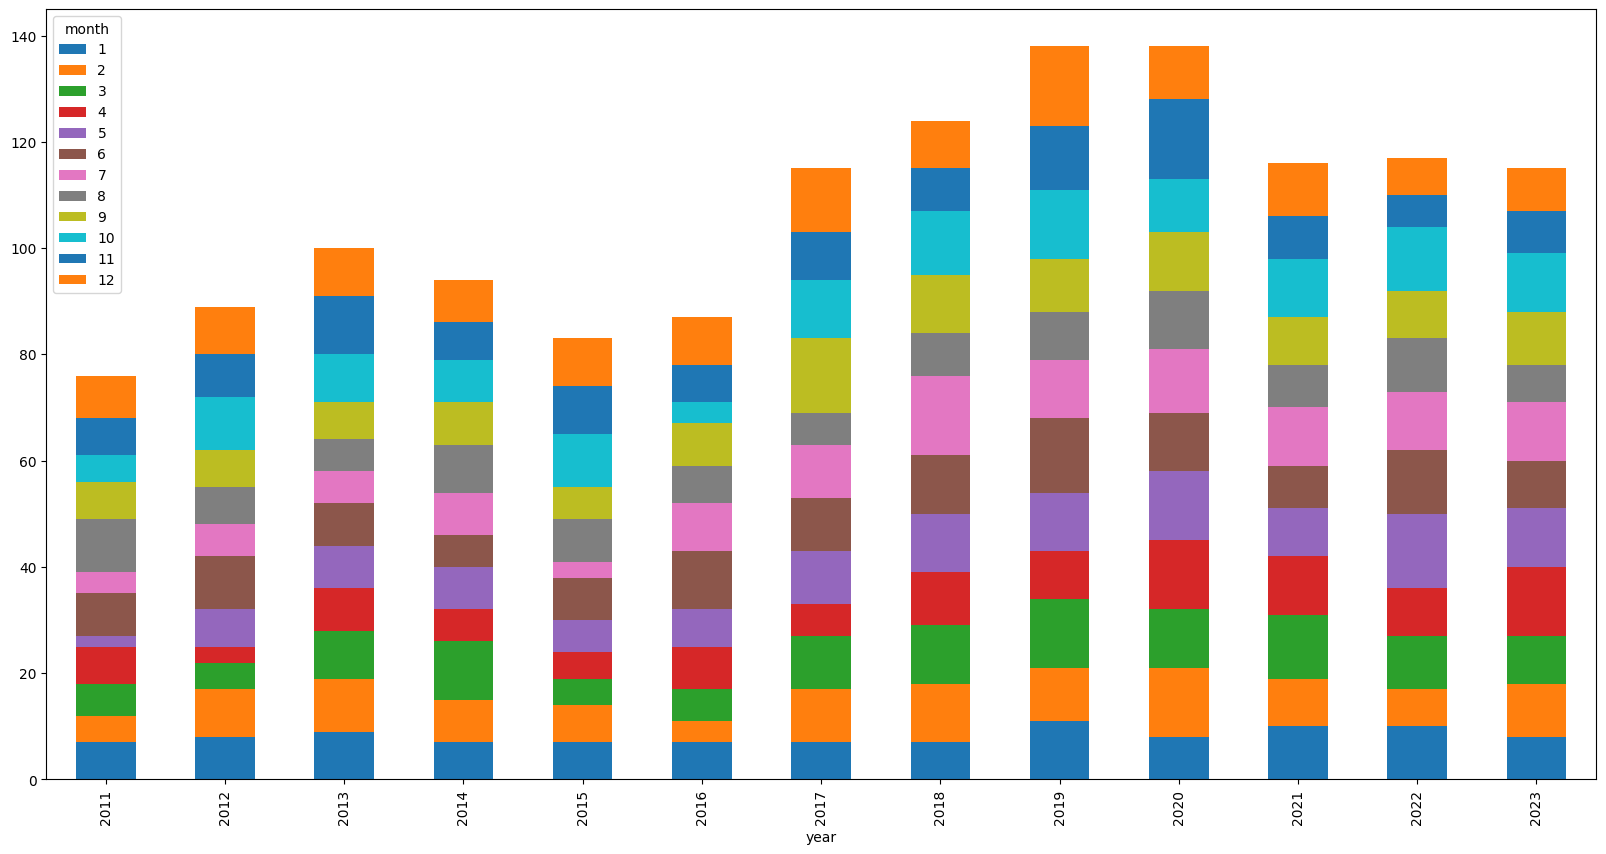

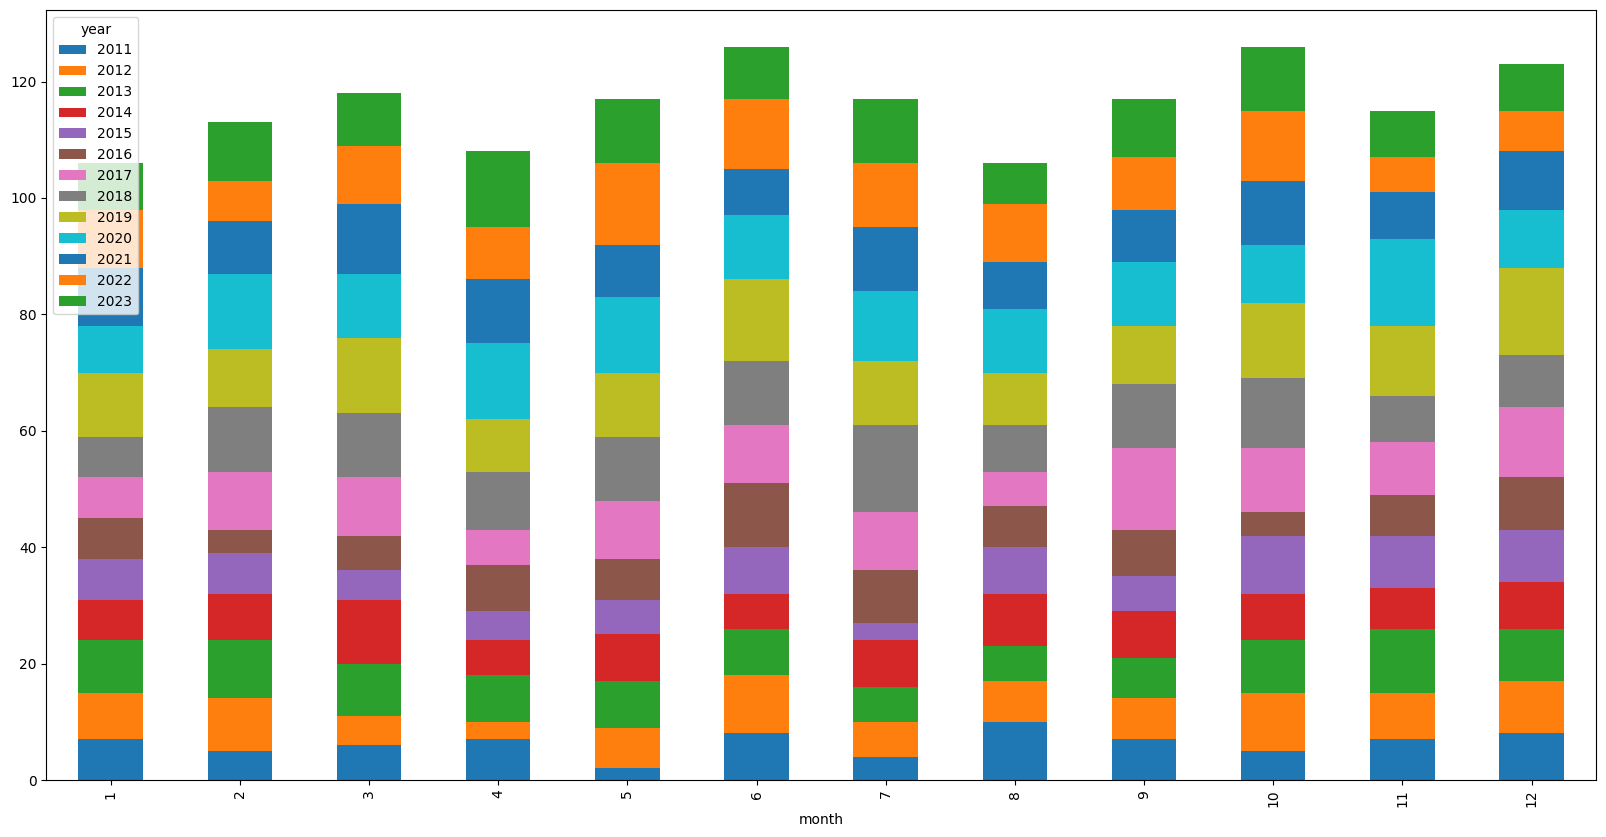

In [71]:
pd_contest_cf = pd_contest[pd_contest['name'].str.contains('Codeforces', regex=False)].copy()
pd_contest_cf['month'] = pd_contest_cf['startTime'].dt.month
pd_contest_cf['year'] = pd_contest_cf['startTime'].dt.year
# drop year 2010 and 2024
pd_contest_cf = pd_contest_cf[pd_contest_cf['year'] != 2024]
pd_contest_cf.groupby(['year', 'month']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(20, 10))
# contest per month (bar) stacked by year
pd_contest_cf.groupby(['month', 'year']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(20, 10))